In [ ]:
import importlib
import draw_task_space #import the module here, so that it can be reloaded.
importlib.reload(draw_task_space)
from draw_task_space import *

import umap
import hdbscan

##! get the task-task density, by task cooccurrence in users from 2008 to 2023. The users are ones with at least 10 answers in all time.

level = 1

df,min_rca_t = get_task_task_density_no_empty(level)

min_rca_t_coefficient = 2


community_list_std1 =  load_obj(f"community_list_std_core_cut_level1", data_path_save + 'networks/probability/')
community_unweighted_level1 = load_obj(f"community_core_with_cut_level1", data_path_save + 'networks/probability/')
community_list_std1_no_empty = [c for c in community_list_std1 if len(community_unweighted_level1[c] ) > 0]
community_list_std2 =  load_obj(f"community_list_std_core_cut_level2", data_path_save + 'networks/probability/')
community_unweighted_level2 = load_obj(f"community_core_with_cut_level2", data_path_save + 'networks/probability/')
community_list_std3 =  load_obj(f"community_list_std_core_cut_level3", data_path_save + 'networks/probability/')
community_unweighted_level3 = load_obj(f"community_core_with_cut_level3", data_path_save + 'networks/probability/')
C_dict3 = {c:i for i,c in enumerate(community_list_std3)}

metro_colors = ['#EA0437', '#87D300', '#FFD100', '#4F1F91', '#A24CC8', '#FF7200', '#009EDB', '#78C7EB', '#BC87E6', '#7C2230', '#007B63', '#D71671', '#F293D1', '#7F7800', '#BBA786', '#32D4CB', '#B67770', '#D6A461', '#DFC765', '#666666', '#999999', '#009090', '#EE352E', '#00933C', '#B933AD', '#808183', '#0039A6', '#FF6319', '#6CBE45', '#996633', '#A7A9AC', '#FCCC0A', '#00ADD0', '#00985F', '#60269E', '#4D5357', '#6E3219', '#CE8E00', '#006983', '#00AF3F', '#C60C30', '#A626AA', '#00A1DE', '#009B3A', '#EE0034', '#8E258D', '#FF7900', '#6E267B', '#A4343A', '#004B87', '#D90627', '#008C95', '#AA0061', '#B58500', '#FFC56E', '#009B77', '#97D700', '#0092BC', '#FF8674', '#9C4F01', '#F4DA40', '#CA9A8E', '#653279', '#6BA539', '#00ABAB', '#D3A3C9', '#F4C1CA', '#D0006F', '#D86018', '#A45A2A', '#D986BA', '#476205', '#D22630', '#A192B2', '#0049A5', '#FF9500', '#F62E36', '#B5B5AC', '#009BBF', '#00BB85', '#C1A470', '#8F76D6', '#00AC9B', '#9C5E31', '#003DA5', '#77C4A3', '#F5A200', '#0C8E72', '#204080', '#C30E2F', '#1CAE4C', '#5288F5', '#E06040', '#3D99C2', '#80E080', '#3D860B', '#3698D2', '#074286', '#1D2A56', '#753778', '#F9BE00', '#2B3990', '#0052A4', '#009D3E', '#EF7C1C', '#00A5DE', '#996CAC', '#CD7C2F', '#747F00', '#EA545D', '#A17E46', '#BDB092', '#B7C452', '#B0CE18', '#0852A0', '#6789CA', '#941E34', '#B21935', '#8A5782', '#9A6292', '#59A532', '#7CA8D5', '#ED8B00', '#FFCD12', '#22246F', '#FDA600', '#0065B3', '#0090D2', '#F97600', '#6FB245', '#509F22', '#ED1C24', '#D4003B', '#8EC31F', '#81A914', '#E04434', '#F04938', '#A17800', '#C7197D', '#5A2149', '#2A5CAA', '#F06A00', '#81BF48', '#BB8C00', '#217DCB', '#D6406A', '#68BD45', '#8652A1', '#004EA2', '#D93F5C', '#00AA80', '#FFB100', '#F08200', '#009088', '#009362', '#007448', '#FF0000', '#009900']

community_hierarchy_color = [] 
for c in community_list_std1_no_empty:
    for ch, tsh in community_unweighted_level3.items():
        if len(set(community_unweighted_level1[c]).intersection(set(tsh)))>0:
            community_hierarchy_color.append(metro_colors[C_dict3[ch]])
            break
        
    if c=='214':
        community_hierarchy_color.append('#B2BEB5')

occ_colors=pd.DataFrame(['community_'+c for c in community_list_std1_no_empty],columns=['occ_code'])
occ_colors['color']=community_hierarchy_color

occspace = df
print(occspace.shape)

print(occspace.index.equals(occspace.columns))

occspace = occspace.fillna(0)


occspace = 1/occspace
occspace = occspace.replace([np.inf, -np.inf], np.nan)
occspace = occspace.fillna(1/min_rca_t**min_rca_t_coefficient)
distmat = occspace.values

np.fill_diagonal(distmat,0)

df.to_csv(data_path_save + 'task_space_draw/df_task_density_1.csv')

(237, 237)
True


d:\software\conda\envs\stack_overflow\lib\site-packages\umap\umap_.py:1858: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
d:\software\conda\envs\stack_overflow\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
d:\software\conda\envs\stack_overflow\lib\site-packages\umap\umap_.py:1858: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
d:\software\conda\envs\stack_overflow\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed f

237

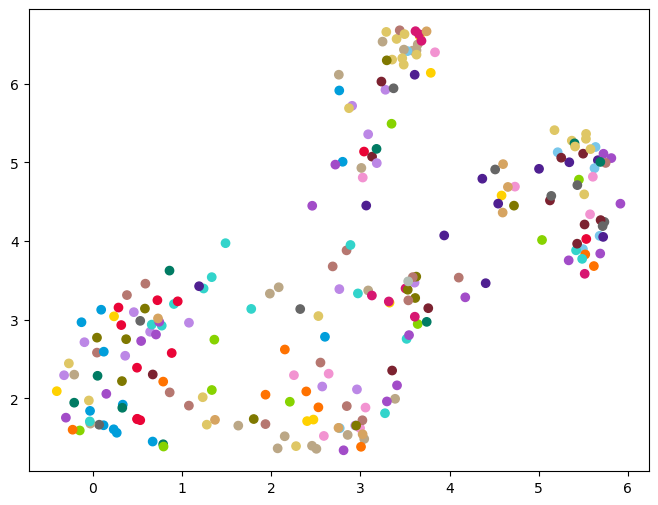

In [2]:
import matplotlib.pyplot as plt

def umapnn(nn=5,md=0.1,n_components=2):
    # init, set metric as "precomputed", and two important parameter.
    # Check https://umap-learn.readthedocs.io/en/latest/parameters.html for parameter explanations.
    reducer = umap.UMAP(metric='precomputed',n_neighbors=nn,random_state=42,min_dist=md,n_components=2)
    position = reducer.fit_transform(distmat)
    # the following just create a df to hold result and merge other properties for viz.
    umapdf = pd.DataFrame(position)
    umapdf.columns=['x','y']
    umapdf['occ_code'] = occspace.index
    umapdf = umapdf.merge(occ_colors[['occ_code','color']],how='left')
    #umapdf = umapdf.merge(occ_labels[['occ_code','label']],how='left')
    plt.figure(figsize=(8,6))
    plt.scatter(umapdf.x,umapdf.y,c=umapdf.color)
    #plt.scatter(umapdf.x,umapdf.y)
    return(umapdf)

def umapDBSCAN(nn=10,md=0.001,n_components=5):
#def umapDBSCAN(nn=15,md=0.1,n_components=30):
    # init, set metric as "precomputed", and two important parameter.
    # Check https://umap-learn.readthedocs.io/en/latest/parameters.html for parameter explanations.
    reducer = umap.UMAP(metric='precomputed',n_neighbors=nn,random_state=42,min_dist=md,n_components=n_components)
    position = reducer.fit_transform(distmat)
    # the following just create a df to hold result and merge other properties for viz.
    umapdf = pd.DataFrame(position)
    umapdf['occ_code'] = occspace.index
    umapdf = umapdf.merge(occ_colors[['occ_code','color']],how='left')
    #umapdf = umapdf.merge(occ_labels[['occ_code','label']],how='left')
    return(umapdf)


umapdf=umapnn(50,0.01,2)
umapdf_DBSCAN=umapDBSCAN(20, 0.001, 5)
len(umapdf_DBSCAN)




# not classified: 27
# classes: 18


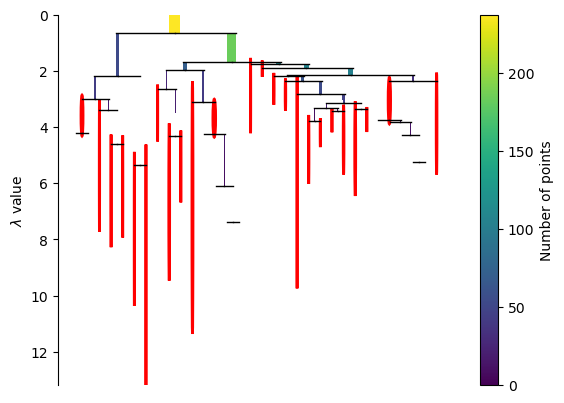

In [3]:
import seaborn as sns

col = 0
test_data=umapdf_DBSCAN.drop(['occ_code','color'],axis=1).values
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True,min_samples=2,cluster_selection_epsilon=.3)
clusterer.fit(test_data)
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
#palette = sns.color_palette(n_colors=len(set(clusterer.labels_)))
cluster_colors = [sns.desaturate(metro_colors[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
print('# not classified:', sum(clusterer.labels_==-1))
print('# classes:', len(set(clusterer.labels_)))

(array([38., 41.,  6.,  3., 32., 34., 25., 14., 23., 21.]),
 array([-1. ,  0.7,  2.4,  4.1,  5.8,  7.5,  9.2, 10.9, 12.6, 14.3, 16. ]),
 <BarContainer object of 10 artists>)

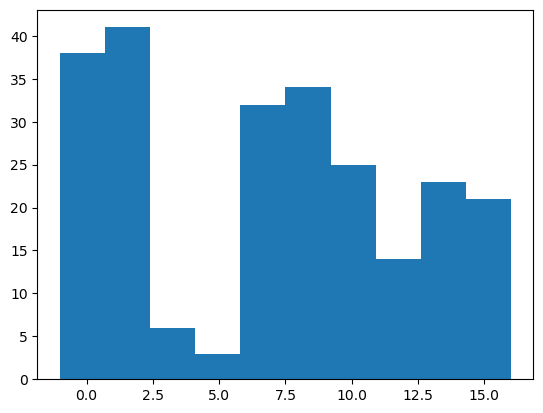

In [4]:
plt.hist(clusterer.labels_)

237
18



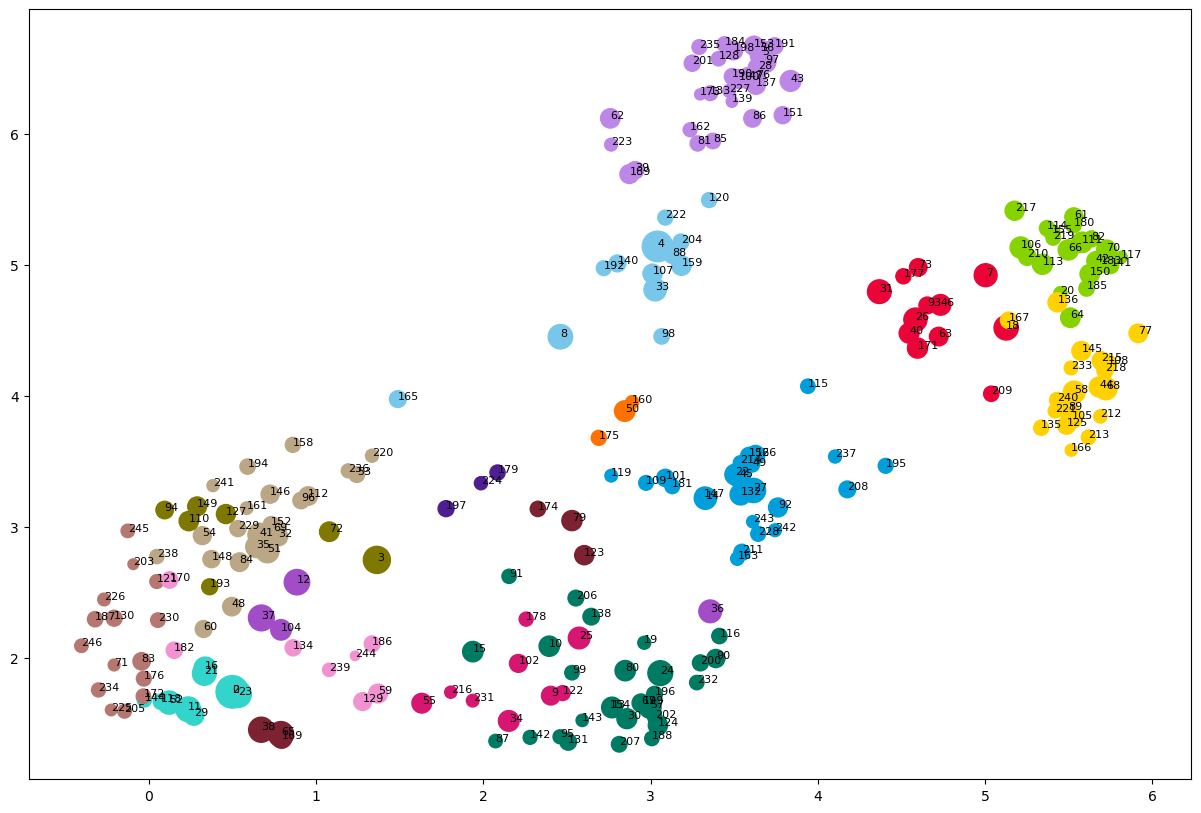

In [ ]:
print(len(umapdf_DBSCAN))
umapdf_DBSCAN2=umapdf_DBSCAN.copy()
umapdf_DBSCAN2['cluster']=clusterer.labels_
umapdf_DBSCAN2['clust_prob']=clusterer.probabilities_
umapdf_DBSCAN2=umapdf_DBSCAN2.merge(umapdf[['occ_code','x','y']],how='right',on='occ_code').reset_index()

pd.set_option('display.max_rows', 500)
print(umapdf_DBSCAN2.cluster.nunique())

print()

umapdf_DBSCAN2['cluster_inc_all'] = umapdf_DBSCAN2['cluster']

umapdf_DBSCAN2['cluster_inc_all'] = umapdf_DBSCAN2['cluster']
UMAP_coor_cols = [i for i in umapdf_DBSCAN2.columns.values if not isinstance(i, str)]

av_coor_clust = umapdf_DBSCAN2[umapdf_DBSCAN2['cluster']!=-1][UMAP_coor_cols]
clust_list = umapdf_DBSCAN2[umapdf_DBSCAN2['cluster']!=-1]['cluster']
def find_closest_cluster(x,av_coor_clust,clust_list):
    dists = []
    for i in av_coor_clust.values:
        dists.append(np.linalg.norm((x.values-i)))
    loc = np.argmin(dists)    
    best_clust = clust_list.iloc[loc]
    return(best_clust)
umapdf_DBSCAN2.loc[umapdf_DBSCAN2['cluster_inc_all']==-1,'cluster_inc_all'] = umapdf_DBSCAN2.loc[umapdf_DBSCAN2['cluster_inc_all']==-1,UMAP_coor_cols].apply(find_closest_cluster, axis=1, args=(av_coor_clust,clust_list,))

plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = ['sans-serif']


df_task_description = pd.read_csv(data_path_save + 'networks/probability/' + 'task_description_30_20_10_5_community_core_with_cut_level_1.csv', dtype=str)
df_dict_5 = pd.Series(df_task_description.task_description_5_words.values,index=df_task_description.task_id).to_dict()


cluster_colors_new = [sns.desaturate(metro_colors[col], 1)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(umapdf_DBSCAN2.cluster_inc_all, umapdf_DBSCAN2.index)]

umapdf_DBSCAN2['node_color'] = cluster_colors_new

task_size = get_task_size([yr for yr in range(2008, 2024)], 1)
ms_size_dict = {t[10:]:task_size[t[10:]] for t in umapdf_DBSCAN2.occ_code}
#ms_size = [np.log10(ms_size_dict[umapdf_DBSCAN2.occ_code[i][10:]]) * 30 - 40 for i in umapdf_DBSCAN2.index]
ms_size = [np.sqrt(ms_size_dict[umapdf_DBSCAN2.occ_code[i][10:]]) *0.5 + 10 for i in umapdf_DBSCAN2.index]

umapdf_DBSCAN2['node_size'] = ms_size

plt.scatter(umapdf_DBSCAN2.x, umapdf_DBSCAN2.y, c=umapdf_DBSCAN2.node_color, s = umapdf_DBSCAN2.node_size)


from adjustText import adjust_text
text_list = []

for i in umapdf_DBSCAN2.index:
    text_list.append(plt.text(umapdf_DBSCAN2.x[i], umapdf_DBSCAN2.y[i], umapdf_DBSCAN2.occ_code[i][10:], size = 8))




# size by user size

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = ['sans-serif']

# Create some example data
x = [umapdf_DBSCAN2.x[i] for i in umapdf_DBSCAN2.index]
y = [umapdf_DBSCAN2.y[i] for i in umapdf_DBSCAN2.index]
task_size_list_yr = defaultdict(list)


tl_periods = [[2008,2009,2010,2011], [2012,2013,2014,2015],[2016,2017,2018,2019],[2020,2021,2022,2023]]

for tlp in tl_periods:
    task_user_set_all = defaultdict(set)
    for yr in tlp:
        task_user_set = load_obj(f'task_user_set_{yr}_level_{level}', data_path_save + 'vote_regression_together/user_c_l_list/')
        for u, tsl in task_user_set.items():
            for t in tsl:
                task_user_set_all[t].add(u)

    task_user_count = {t:len(ul) for t, ul in task_user_set_all.items()}
    task_size_list = [np.sqrt(task_user_count[t[10:]]) * 2.3 for t in umapdf_DBSCAN2.occ_code]
    task_size_normalized = [si/sum(task_size_list) for si in task_size_list]

    #tuned_min = 20
    #tuned_max = 500

    #a_linear = (tuned_max - tuned_min) /(max(task_size_normalized) - min(task_size_normalized))
    #b_linear = tuned_max - a_linear * max(task_size_normalized)
    #adjust_list = [a_linear * si + b_linear for si in task_size_normalized]
    adjust_list = task_size_list

    for s,t in zip(adjust_list, umapdf_DBSCAN2.occ_code):
        task_size_list_yr[t[10:]].append(s)

task_size_max = {t:max(sl) for t, sl in task_size_list_yr.items()}



<Figure size 1500x1000 with 0 Axes>

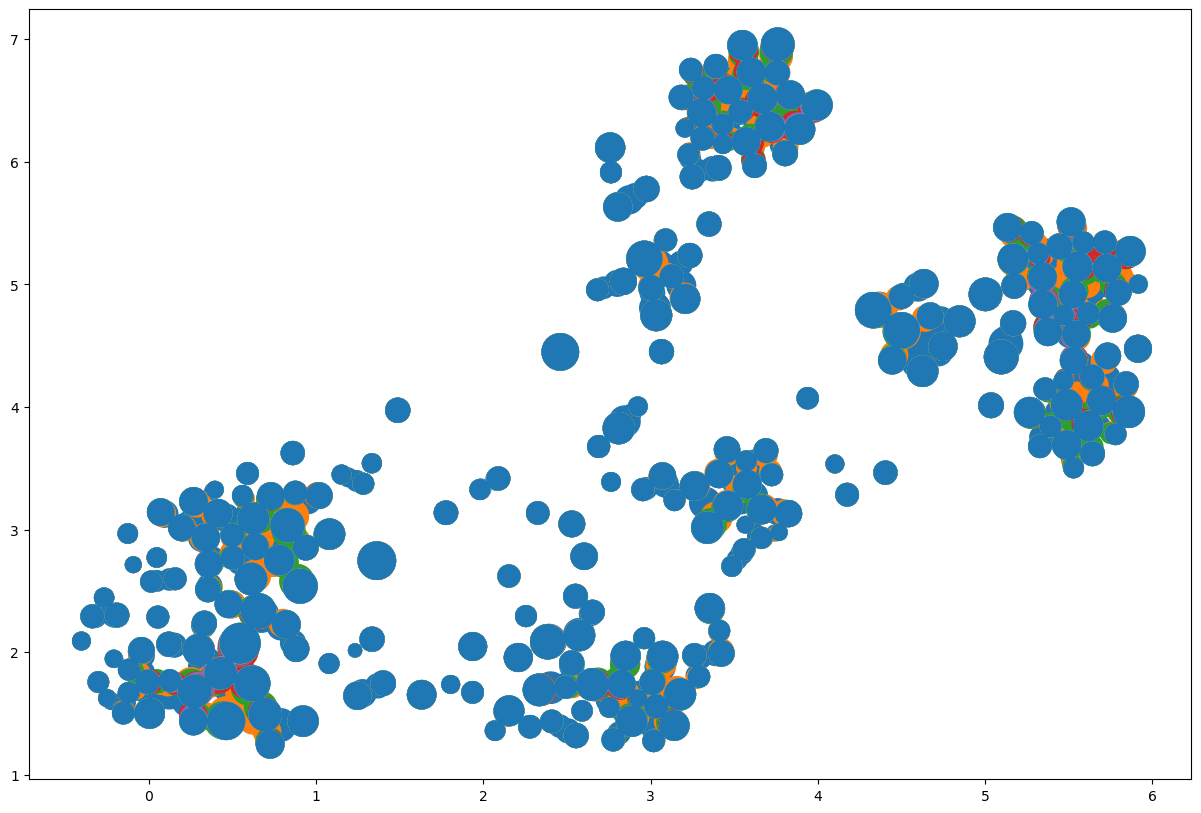

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = ['sans-serif']

# Create some example data
x = [umapdf_DBSCAN2.x[i] for i in umapdf_DBSCAN2.index]
y = [umapdf_DBSCAN2.y[i] for i in umapdf_DBSCAN2.index]
s = [task_size_max[umapdf_DBSCAN2.occ_code[i][10:]] for i in umapdf_DBSCAN2.index]
index_list = [i for i in range(len(x))]

iterate_sign = True
iterate_num = 0

while(iterate_sign):
    iterate_num += 1
    if iterate_num % 200 == 0:
        print(iterate_num)
    iterate_sign = False
    sc = plt.scatter(x, y, s=s)
    ax = plt.gca()
    R = []
    for i in range(len(x)):
        #data_units_xi, data_units_yi = points_to_data_units(fig, s[i]**0.5, ax)
        #R.append((np.sqrt(max(data_units_xi**2, data_units_yi**2) *1)))
        R.append(s[i]**0.5 * 1.)

    x1,y1 = points_to_data_units(fig, 1, ax)

    for i in index_list:
        for j in index_list:
            if i < j:
                temp = np.sqrt((x[i]/x1-x[j]/x1)**2 + (y[i]/y1-y[j]/y1)**2) - R[i] - R[j]
                if temp < 0:
                    #print(temp)
                    move_dist = np.abs(temp)/np.sqrt(2)
                    move_dist_x = np.sqrt((x[i]/x1-x[j]/x1)**2 / ((x[i]/x1-x[j]/x1)**2 + (y[i]/y1-y[j]/y1)**2)) * move_dist
                    move_dist_y = np.sqrt((y[i]/y1-y[j]/y1)**2 / ((x[i]/x1-x[j]/x1)**2 + (y[i]/y1-y[j]/y1)**2)) * move_dist
                    #move_dist_x = move_dist/1.1
                    #move_dist_y = move_dist/1.1
                    
                    if x[i] < x[j]:
                        x[i] -= move_dist_x * x1
                        x[j] += move_dist_x * x1
                    else:
                        x[i] += move_dist_x * x1
                        x[j] -= move_dist_x * x1
                    
                    if y[i] < y[j]:
                        y[i] -= move_dist_y * y1
                        y[j] += move_dist_y * y1
                    else:
                        y[i] += move_dist_y * y1
                        y[j] -= move_dist_y * y1

    for i in index_list:
        for j in index_list:
            if i < j:
                temp = np.sqrt((x[i]/x1-x[j]/x1)**2 + (y[i]/y1-y[j]/y1)**2) - R[i] - R[j]
                if temp < 0:
                    iterate_sign = True




#plt.scatter(x, y, s=s)
#plt.show()

In [19]:
x_list = [xi for i,xi in zip(umapdf_DBSCAN2.index, x)]
y_list = [yi for i,yi in zip(umapdf_DBSCAN2.index, y)]
umapdf_DBSCAN2['adjusted_x'] = x_list
umapdf_DBSCAN2['adjusted_y'] = y_list
umapdf_DBSCAN2.to_csv(data_path_save + 'task_space_draw/' + 'umapdf_DBSCSN2_level1_user_count.csv')

save_obj(umapdf_DBSCAN2, 'umapdf_DBSCAN2_level1_user_count', data_path_save + 'task_space_draw/')

In [21]:
cluster_conclusion_adjusted = {0: 'Basic Web Dev',
1: 'Web Design' ,
2: 'Web Frameworks',
3: 'Desktop Apps',
4: 'Basic Programming\nConcepts',
5: 'Enterprise IT',
6: 'Enterprise and Web App Dev',
7: 'iOS',
8: 'Android',
9: 'SQL and Databases',
10: 'DevOps',
11: 'Cloud Computing',
12: 'Data Collection\nand Processing',
13: 'Networking',
14: 'Advanced Programming Concepts',
15: 'AI/ML',
16: "Statistics and\nData Analysis"
}

cluster_text_x = {0:3.85,
1:5.3,
2:4.9,
3:1.6,
4:1.0,
5:2.5,
6:3.8,
7:2.3,
8:2.5,
9:2,
10:3.4,
11:1.45,
12:1.02,
13:-0.6,
14:-0.4,
15:0.71,
16:-0.8
}
cluster_text_y = {0:5.2,
1:5.7,
2:3.2,
3:3.53,
4:2.2,
5:4.1,
6:2.76,
7:5,
8:6.7,
9:2.9,
10:1.6,
11:1.8,
12:1.15,
13:3.4,
14:3.75,
15:1.66,
16:0.91
}

df_dict_c = pd.Series(umapdf_DBSCAN2.node_color.values,index=umapdf_DBSCAN2.cluster_inc_all).to_dict()

dfl1 = [c for c in cluster_conclusion_adjusted.keys()]
dfl2 = [cluster_conclusion_adjusted[c] for c in dfl1]
dflx = [cluster_text_x[c] for c in dfl1]
dfly = [cluster_text_y[c] for c in dfl1]
dflc = [df_dict_c[c] for c in dfl1]
df_cluster_adjusted = pd.DataFrame.from_dict({'cluster': dfl1, 'description': dfl2, 'x':dflx, 'y':dfly, 'color':dflc})
df_cluster_adjusted.to_csv(data_path_save + 'task_space_draw/' + 'cluster_description_adjusted.csv')

save_obj(df_cluster_adjusted, 'cluster_conclusion_adjusted', data_path_save + 'task_space_draw/')